In [1]:
import os
import re
from pathlib import Path
from nltk.tokenize import RegexpTokenizer
from collections import Counter
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.exceptions import ConvergenceWarning
import numpy as np
from scipy import stats
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  
import random
random.seed()
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)
import nltk
from nltk.stem import SnowballStemmer
nltk.download("wordnet")
from nltk.corpus import stopwords 
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to C:\Users\Naga Raja
[nltk_data]     Paidimarri\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Naga Raja
[nltk_data]     Paidimarri\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
DATA_DIR = "20_newsgroups"

In [11]:
def clean_file_text(text):
    new_text = re.sub("Newsgroups:.*?\n", "", text)
    new_text = re.sub("Xref:.*?\n", "", new_text)
    new_text = re.sub("Path:.*?\n", "", new_text)
    new_text = re.sub("Date:.*?\n", "", new_text)
    new_text = re.sub("Followup-To:.*?\n", "", new_text)
    return new_text

In [12]:
def corpus_count_words(file_list):
    tokenizer = RegexpTokenizer(r'\w+')
    word_counter = Counter()
    for file_path in file_list:
        with open(file_path, 'r', encoding='utf-8', errors='ignore') as file:
            file_data = file.read()
            file_data = clean_file_text(file_data)
            file_words = tokenizer.tokenize(file_data)
            word_counter.update(file_words)
    return word_counter

In [13]:
def get_topic_name(file_path):
    return file_path.parent.name

def get_target(topic_name):
    topics = ['talk.politics.mideast', 'rec.autos', 'comp.sys.mac.hardware', 'alt.atheism', 'rec.sport.baseball', 
     'comp.os.ms-windows.misc', 'rec.sport.hockey', 'sci.crypt', 'sci.med', 'talk.politics.misc', 
     'rec.motorcycles', 'comp.windows.x', 'comp.graphics', 'comp.sys.ibm.pc.hardware', 'sci.electronics',
     'talk.politics.guns', 'sci.space', 'soc.religion.christian', 'misc.forsale', 'talk.religion.misc']
    return topics.index(topic_name)

In [14]:
def plot_confusion_matrix(cm):
    # plot the confusion matrix
    plt.figure(figsize=(10,10))
    plt.matshow(cm, fignum=1)
    
    # add labels for all targets
    num_targets = cm.shape[0]
    plt.xticks(list(range(num_targets+1)))
    plt.yticks(list(range(num_targets+1)))

## Q1

In [39]:
all_files = [pth for pth in Path(DATA_DIR).glob("**/*") if pth.is_file() and not pth.name.startswith(".")]

In [22]:
all_files[0]

WindowsPath('20_newsgroups/alt.atheism/49960')

In [35]:
x = open('20_newsgroups/alt.atheism/49960', 'r', encoding='utf-8', errors='ignore')
y = x.read()
z = clean_file_text(y)
tokenizer = RegexpTokenizer(r'\w+')
w = tokenizer.tokenize(z)

In [32]:
y[0:1000]

'Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49960 alt.atheism.moderated:713 news.answers:7054 alt.answers:126\nPath: cantaloupe.srv.cs.cmu.edu!crabapple.srv.cs.cmu.edu!bb3.andrew.cmu.edu!news.sei.cmu.edu!cis.ohio-state.edu!magnus.acs.ohio-state.edu!usenet.ins.cwru.edu!agate!spool.mu.edu!uunet!pipex!ibmpcug!mantis!mathew\nFrom: mathew <mathew@mantis.co.uk>\nNewsgroups: alt.atheism,alt.atheism.moderated,news.answers,alt.answers\nSubject: Alt.Atheism FAQ: Atheist Resources\nSummary: Books, addresses, music -- anything related to atheism\nKeywords: FAQ, atheism, books, music, fiction, addresses, contacts\nMessage-ID: <19930329115719@mantis.co.uk>\nDate: Mon, 29 Mar 1993 11:57:19 GMT\nExpires: Thu, 29 Apr 1993 11:57:19 GMT\nFollowup-To: alt.atheism\nDistribution: world\nOrganization: Mantis Consultants, Cambridge. UK.\nApproved: news-answers-request@mit.edu\nSupersedes: <19930301143317@mantis.co.uk>\nLines: 290\n\nArchive-name: atheism/resources\nAlt-atheism-archive-name: resources\nLast-m

In [33]:
z[0:1000]

'From: mathew <mathew@mantis.co.uk>\nSubject: Alt.Atheism FAQ: Atheist Resources\nSummary: Books, addresses, music -- anything related to atheism\nKeywords: FAQ, atheism, books, music, fiction, addresses, contacts\nMessage-ID: <19930329115719@mantis.co.uk>\nExpires: Thu, 29 Apr 1993 11:57:19 GMT\nDistribution: world\nOrganization: Mantis Consultants, Cambridge. UK.\nApproved: news-answers-request@mit.edu\nSupersedes: <19930301143317@mantis.co.uk>\nLines: 290\n\nArchive-name: atheism/resources\nAlt-atheism-archive-name: resources\nLast-modified: 11 December 1992\nVersion: 1.0\n\n                              Atheist Resources\n\n                      Addresses of Atheist Organizations\n\n                                     USA\n\nFREEDOM FROM RELIGION FOUNDATION\n\nDarwin fish bumper stickers and assorted other atheist paraphernalia are\navailable from the Freedom From Religion Foundation in the US.\n\nWrite to:  FFRF, P.O. Box 750, Madison, WI 53701.\nTelephone: (608) 256-8900\n\nEVOL

In [36]:
w

['From',
 'mathew',
 'mathew',
 'mantis',
 'co',
 'uk',
 'Subject',
 'Alt',
 'Atheism',
 'FAQ',
 'Atheist',
 'Resources',
 'Summary',
 'Books',
 'addresses',
 'music',
 'anything',
 'related',
 'to',
 'atheism',
 'Keywords',
 'FAQ',
 'atheism',
 'books',
 'music',
 'fiction',
 'addresses',
 'contacts',
 'Message',
 'ID',
 '19930329115719',
 'mantis',
 'co',
 'uk',
 'Expires',
 'Thu',
 '29',
 'Apr',
 '1993',
 '11',
 '57',
 '19',
 'GMT',
 'Distribution',
 'world',
 'Organization',
 'Mantis',
 'Consultants',
 'Cambridge',
 'UK',
 'Approved',
 'news',
 'answers',
 'request',
 'mit',
 'edu',
 'Supersedes',
 '19930301143317',
 'mantis',
 'co',
 'uk',
 'Lines',
 '290',
 'Archive',
 'name',
 'atheism',
 'resources',
 'Alt',
 'atheism',
 'archive',
 'name',
 'resources',
 'Last',
 'modified',
 '11',
 'December',
 '1992',
 'Version',
 '1',
 '0',
 'Atheist',
 'Resources',
 'Addresses',
 'of',
 'Atheist',
 'Organizations',
 'USA',
 'FREEDOM',
 'FROM',
 'RELIGION',
 'FOUNDATION',
 'Darwin',
 'fish'

In [44]:
y = [get_target(get_topic_name(file_path)) for file_path in all_files]

In [46]:
u = [get_topic_name(file_path) for file_path in all_files]

In [59]:
n = [get_topic_name(all_files[0])]

In [60]:
n

['alt.atheism']

In [40]:
def binary_baseline_data(file_list, num_words = 1000):
    # Calculate word count in corpus
    news_cnt = corpus_count_words(file_list)
    
    # Select the most common numWords
    word_list = [word for (word, freq) in news_cnt.most_common(num_words)]
    
    # Create a binary encoding of dataset based on the selected features (X)
    tokenizer = RegexpTokenizer(r'\w+')
    df_rows = []
    for file_path in file_list:
        with open(file_path, 'r', encoding='utf-8', errors='ignore') as file:
            file_data = file.read()
            file_data = clean_file_text(file_data)
            file_words = tokenizer.tokenize(file_data)
            df_rows.append([1 if word in file_words else 0 for word in word_list])      
    X = pd.DataFrame(df_rows, columns = word_list)
    
    # Create a dataframe of targets (y)
    y = [get_target(get_topic_name(file_path)) for file_path in file_list]
    
    return X, y

In [41]:
# get the baseline data
X, y = binary_baseline_data(all_files)

# split to train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# train a logistic regression classifier
clf = LogisticRegression(C=1.0).fit(X_train, y_train)

# predict on train and test set
y_train_predict = clf.predict(X_train)
y_test_predict = clf.predict(X_test)

# calculate train and test accuracy
train_accuracy = accuracy_score(y_train, y_train_predict)
test_accuracy = accuracy_score(y_test, y_test_predict)

# report results
print("Train accuracy: {}".format(train_accuracy))
print("Test accuracy: {}".format(test_accuracy))

Train accuracy: 0.9124812459812817
Test accuracy: 0.6978333333333333


In [67]:
X_train

,the,to,of,a,and,I,is,in,that,AX,...,friend,HP,isc,present,shall,outside,cars,weapons,Summary,recently
19977,1,1,1,1,1,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
10779,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17224,1,1,1,1,1,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
7369,1,0,0,1,1,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
16330,1,1,1,1,1,1,1,1,1,0,...,1,0,0,0,0,0,0,0,0,0
8072,1,1,1,1,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
10907,1,1,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2788,1,1,1,1,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4901,1,1,1,1,1,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1180,1,1,0,1,1,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
y[7771:7777]

[1, 1, 1, 1, 1, 1]

### Q1 (a)

Feature Set: The features are the top 1000 most common words in the entire corpus of 232013 unique words encompassing 19997 documents. 

The amount of data: The total data is 19997 * 1000 matrix (Excluding the y column). This is randomly split in to 70% train and 30% test. Now the train data set is 13997 * 1000 and the test data set is 6000 * 1000 matrix.

Hyperparameter: The default hyperparameter for logistic regression is used here. This is c = 1.0

### Q1 (b)

Modify the following function:

In [68]:
def binary_improved_data(file_list, num_words = 1000):

    import nltk
    from nltk.stem import SnowballStemmer
    nltk.download("wordnet")
    from nltk.corpus import stopwords 
    nltk.download('stopwords')
    sbStem = SnowballStemmer("english")
    tokenizer = RegexpTokenizer(r'\w+')
    news_cnt = Counter()
    for file_path in file_list:
        with open(file_path, 'r', encoding='utf-8', errors='ignore') as file:
            file_data = file.read()
            file_data = clean_file_text(file_data)
            file_words = tokenizer.tokenize(file_data)
            file_words = [sbStem.stem(w) for w in file_words if w.lower() not in stopwords.words('english')]
            #file_words = [sbStem.stem(w) for w in file_words if w.lower() not in stopwords.words('english') and len(w) > 2]
            #file_words = [w for w in file_words if len(w) > 1]
            #file_words = [sbStem.stem(word) for word in file_words]
            news_cnt.update(file_words)
   
    word_list = [word for (word, freq) in news_cnt.most_common(num_words)]   
    

    tokenizer = RegexpTokenizer(r'\w+')
    df_rows = []
    for file_path in file_list:
        with open(file_path, 'r', encoding='utf-8', errors='ignore') as file:
            file_data = file.read()
            file_data = clean_file_text(file_data)
            file_words = tokenizer.tokenize(file_data)
            file_words = [sbStem.stem(word) for word in file_words]
            df_rows.append([1 if word in file_words else 0 for word in word_list])      
    X = pd.DataFrame(df_rows, columns = word_list)
    

    y = [get_target(get_topic_name(file_path)) for file_path in file_list]
      
    #X = None
    #y = None
    
    # validate return types
    assert isinstance(X, pd.DataFrame) and isinstance(y, list), "return types"
    
    return X, y

### Q1 (c)

Modify the following partial code to calculate the train and test accuracy and answer the question in the markdown cell below

In [ ]:
# get the baseline data
X, y = binary_improved_data(all_files)


# split to train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# train a logistic regression classifier
clf = LogisticRegression(C=1.0).fit(X_train, y_train)

# predict on train and test set
y_train_predict = clf.predict(X_train)
y_test_predict = clf.predict(X_test)

# calculate train and test accuracy
train_accuracy = accuracy_score(y_train, y_train_predict)
test_accuracy = accuracy_score(y_test, y_test_predict)

# report results
print("Train accuracy: {}".format(train_accuracy))
print("Test accuracy: {}".format(test_accuracy))


[nltk_data] Downloading package wordnet to C:\Users\Naga Raja
[nltk_data]     Paidimarri\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Naga Raja
[nltk_data]     Paidimarri\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**The new improved baseline**

1. Train Accuracy is 0.9326
2. Test Accuracy is 0.7435 

**The previous baseline**

1. Train accuracy: 0.9124
2. Test accuracy: 0.6978

We can clearly see that both train(2%) and test accuracy (5%) are improved. Even the difference(gap) in the accuracy is reduced from 21% to 19%. So, the modifications made have improved the accuracy considerabily. 

The improvement in the performance is due to the following changes in the code:
1. Snowball stemmer has been used to stem the words
2. Stop words are removed as these are not specific to any document.
 

### Q1 (d)

Modify the partial code below

In [21]:
def random_mean_ci(X, y, num_tests):
    # train_results is a list of train accuracy results for the differrent random splits of the dataset
    train_results = []
    
    # test_results is a list of test accuracy results for the differrent random splits of the dataset
    test_results = []
    
    for i in range(0,num_tests):
    
        # split to train and test set
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random.randint(1,1000))

        # train a logistic regression classifier
        clf = LogisticRegression(C=1.0).fit(X_train, y_train)

   
        y_train_predict = clf.predict(X_train)
        y_test_predict = clf.predict(X_test)

        train_accuracy = accuracy_score(y_train, y_train_predict)
        test_accuracy = accuracy_score(y_test, y_test_predict)

        train_results.append(train_accuracy)
        test_results.append(test_accuracy)
    
    
    
    train_mean = np.mean(train_results)
    train_ci_low, train_ci_high = stats.t.interval(0.95, len(train_results)-1, loc=train_mean, scale=stats.sem(train_results))
    

    test_mean = np.mean(test_results)
    test_ci_low, test_ci_high = stats.t.interval(0.95, len(test_results)-1, loc=test_mean, scale=stats.sem(test_results))
    

    assert isinstance(train_mean, float) and isinstance(train_ci_low, float) and isinstance(train_ci_high, float), "return types"
    assert isinstance(test_mean, float) and isinstance(test_ci_low, float) and isinstance(test_ci_high, float), "return types"
    
    return train_mean, train_ci_low, train_ci_high, test_mean, test_ci_low, test_ci_high

### Q1 (e)

Use the following code to calculate the mean accuracy and 95% confidence interval over 10 random splits

In [22]:
train_mean10, train_low10, train_high10, test_mean10, test_low10, test_high10 = random_mean_ci(X, y, num_tests = 10)
print("Train mean accuracy over 10 random splits: {}".format(train_mean10))
print("Train confidence interval over 10 random splits: [{}, {}]".format(train_low10, train_high10))
print("Test mean accuracy over 10 random splits: {}".format(test_mean10))
print("Test confidence interval over 10 random splits: [{}, {}]".format(test_low10, test_high10))

Train mean accuracy over 10 random splits: 0.9347788811888261
Train confidence interval over 10 random splits: [0.9334638089634528, 0.9360939534141994]
Test mean accuracy over 10 random splits: 0.7517333333333334
Test confidence interval over 10 random splits: [0.7479877847692368, 0.75547888189743]


Yes

They are more infomrative
1. The earlier accuracy was only for a particular random split but averaging over 10 random splits and taking the mean gives us better understanding of the model.
2. Assuming the t-distribution from these 10 splits we can get the 95% confidence interval. These means we are confident that 95 out of 100 times our model accuracy will be in this range for a random sample of the train set and the expected value is given by mean accuracy  


The answer: 

1. Train mean accuracy over 10 random splits: 0.9347788811888261
2. Train confidence interval over 10 random splits: [0.9334638089634528, 0.9360939534141994]
3. Test mean accuracy over 10 random splits: 0.7517333333333334
4. Test confidence interval over 10 random splits: [0.7479877847692368, 0.75547888189743]


### Q1 (f)

Modify the partial code below

In [104]:
def random_cm(X, y, num_tests):
    # cm_list is a list of confusion matrices for the different random splits of the dataset        
    cm_list = []
    
    for i in range(0,num_tests):
    

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random.randint(1,1000))

        clf = LogisticRegression(C=1.0).fit(X_train, y_train)

        y_train_predict = clf.predict(X_train)
        y_test_predict = clf.predict(X_test)
        
        #print(y_test_predict)
        #print(y_test)
        
        cm_list.append(confusion_matrix(y_test, y_test_predict))  

    combined_cm = pd.Panel(cm_list).sum(axis=0)
    
    assert isinstance(combined_cm, pd.DataFrame), "return type"
    
    return combined_cm

### Q1 (g)

Use the following code to produce a confusion matrix for 10 random splits

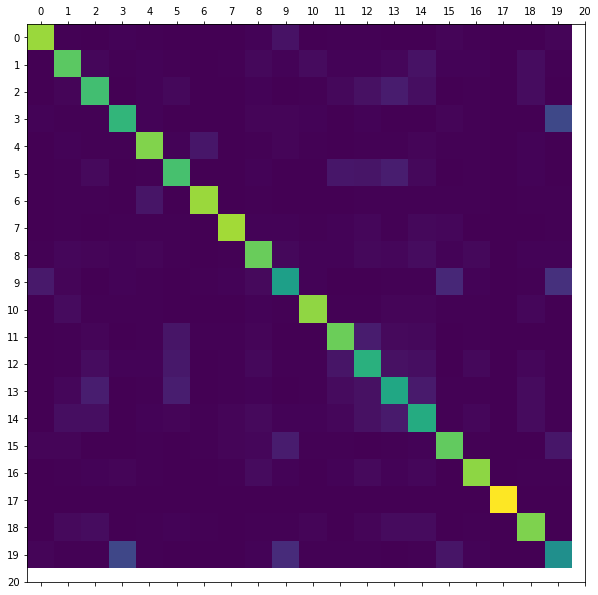

In [24]:
cm10 = random_cm(X, y, num_tests = 10)
plot_confusion_matrix(cm10)

In [106]:
#pd.DataFrame(cm10)

Yes, some some classes are more confused with others.

**Easily confused**

Class 3:alt.atheism  & Class 19:talk.religion.misc

Class 9:talk.politics.misc  & Class 19:talk.religion.misc

Class 13:comp.sys.ibm.pc.hardware  & Class 2:comp.sys.mac.hardware

Classes (5,11,12,13) 

These classes are easily confused because they have many common words. This is a drawback in the unigram approach becuase if we have common words it assumes it has significance in all the documents it occurs but not the context in which they are used.

Class 17: soc.religion.christian. Is rarely confused with others.

This can be due to the fact that its documents has many unique words explicit to this class


topics 

['talk.politics.mideast 0', 'rec.autos 1', 'comp.sys.mac.hardware 2', 'alt.atheism 3', 'rec.sport.baseball 4', 
     'comp.os.ms-windows.misc 5', 'rec.sport.hockey 6', 'sci.crypt 7', 'sci.med 8', 'talk.politics.misc 9', 
     'rec.motorcycles 10', 'comp.windows.x 11', 'comp.graphics 12', 'comp.sys.ibm.pc.hardware 13', 'sci.electronics 14',
     'talk.politics.guns 15 ', 'sci.space 16', 'soc.religion.christian 17', 'misc.forsale 18 ', 'talk.religion.misc 19']


## Q2

### Q2 (a)

Modify the partial code below

In [26]:
def feature_num(X, y):
    # result_list is a list of tuples (num_features, train_accuracy, test_accuracy)
    # where numFeatures is the number of words used as features
    result_list = []
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    for p in [0.1, 0.2, 0.4, 0.6, 0.8, 1.0]:
        subset_size = int(p*X.shape[1])
        X_train_subset = X_train.iloc[:, 0:subset_size]
        X_test_subset = X_test.iloc[:, 0:subset_size]

        clf = LogisticRegression(C=1.0).fit(X_train_subset, y_train)

        # predict on train and test set
        y_train_predict = clf.predict(X_train_subset)
        y_test_predict = clf.predict(X_test_subset)

        # calculate train and test accuracy
        train_accuracy = accuracy_score(y_train, y_train_predict)
        test_accuracy = accuracy_score(y_test, y_test_predict)       
        
#         train_accuracy = None
#         test_accuracy = None
        # add to result_list
        result_list.append((p, train_accuracy, test_accuracy))
        
    # Make a dataframe of the results
    result_df = pd.DataFrame(result_list, columns=["num_features", "train_accuracy", "test_accuracy"])
    
    # validate return type
    assert isinstance(result_df, pd.DataFrame), "return type"
    
    return result_df

### Q2 (b)

Use the following code to plot the train and test accuracy for the different feature sets sizes

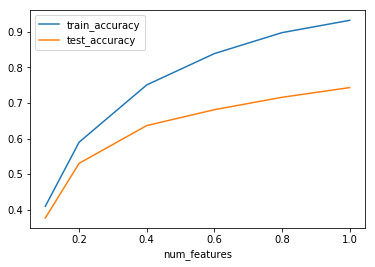

In [27]:
feature_num_df = feature_num(X, y)
feature_num_df.plot(x="num_features", y=["train_accuracy", "test_accuracy"])

In [99]:
# feature_num_df

We can see that the train and test accuracy are increasing with increasing number of features.

1. If the model has more features, in this case, the model is better able to classify different documents because it has more words (features) to learn from.
2. Although both are increasing the test accuracy is increasing at lower rate becuase the model is overfitting on the train data.


## Q3

### Q3 (a)

Modify the partial code below

In [29]:
def hyperparameter(X, y):
    # result_list is a list of tuples (num_features, train_accuracy, test_accuracy)
    # where numFeatures is the number of words used as features
    result_list = []
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    for param in [0.001, 0.01, 0.1, 1, 10, 100, 1000]:

        clf = LogisticRegression(C=param).fit(X_train, y_train)

        # predict on train and test set
        y_train_predict = clf.predict(X_train)
        y_test_predict = clf.predict(X_test)

        # calculate train and test accuracy
        train_accuracy = accuracy_score(y_train, y_train_predict)
        test_accuracy = accuracy_score(y_test, y_test_predict)  
    
#         train_accuracy = None
#         test_accuracy = None
        
        # add to result_list
        result_list.append((param, train_accuracy, test_accuracy))
        
    # Make a dataframe of the results
    result_df = pd.DataFrame(result_list, columns=["param", "train_accuracy", "test_accuracy"])
    
    # validate return type
    assert isinstance(result_df, pd.DataFrame), "return type"
    
    return result_df

### Q3 (b)

Use the following code to plot the train and test accuracy for the different the parameters

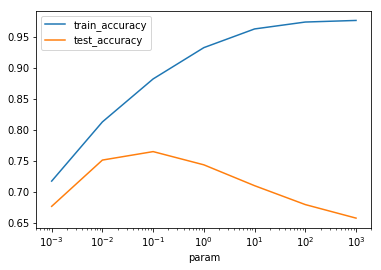

In [30]:
param_df = hyperparameter(X, y)
param_df.plot(x="param", y=["train_accuracy", "test_accuracy"], logx=True)

By increasing the hyper parameter the train accuracy is increasing and test accuracy reaches a maximum at c = 0.1 and starts to decrease.

1. For higher c (1/regularization strength) values the regularization constant decreases and the model starts to overfit.
2. For lower c values the regularization values are very high and this leads to penalizing weights too much. Due to this the model is not learning and test accuracy is low.

## Q4

### Q4 (a)

Modify the partial code below

In [31]:
def tf_improved_data(file_list, num_words = 1000):
    import nltk
    from nltk.stem import SnowballStemmer
    nltk.download("wordnet")
    from nltk.corpus import stopwords 
    nltk.download('stopwords')
    sbStem = SnowballStemmer("english")
    tokenizer = RegexpTokenizer(r'\w+')
    news_cnt = Counter()
    for file_path in file_list:
        with open(file_path, 'r', encoding='utf-8', errors='ignore') as file:
            file_data = file.read()
            file_data = clean_file_text(file_data)
            file_words = tokenizer.tokenize(file_data)
            file_words = [sbStem.stem(w) for w in file_words if w.lower() not in stopwords.words('english')]
            #file_words = [sbStem.stem(word) for word in file_words]
            news_cnt.update(file_words)
   
   
    word_list = [word for (word, freq) in news_cnt.most_common(num_words)]   
    
    tokenizer = RegexpTokenizer(r'\w+')
    df_rows = []
    for file_path in file_list:
        with open(file_path, 'r', encoding='utf-8', errors='ignore') as file:
            file_data = file.read()
            file_data = clean_file_text(file_data)
            file_words = tokenizer.tokenize(file_data)
            file_words = [sbStem.stem(word) for word in file_words]
            df_rows.append([file_words.count(word) if word in file_words else 0 for word in word_list])      
    X = pd.DataFrame(df_rows, columns = word_list)

    y = [get_target(get_topic_name(file_path)) for file_path in file_list]
         
#     X = None
#     y = None
    
    assert isinstance(X, pd.DataFrame) and isinstance(y, list), "return types"
    
    return X, y

# df_rows.append([file_words.count(word) if word in file_words else 0 for word in word_list])      

### Q4 (b)

Use the following code to calculate the mean accuracy and 95% confidence interval over multiple random splits

In [32]:
X_tf, y_tf = tf_improved_data(all_files)
train_mean10, train_low10, train_high10, test_mean10, test_low10, test_high10 = random_mean_ci(X_tf, y_tf, num_tests = 10)
print("Train mean accuracy over 10 random splits: {}".format(train_mean10))
print("Train confidence interval over 10 random splits: [{}, {}]".format(train_low10, train_high10))
print("Test mean accuracy over 10 random splits: {}".format(test_mean10))
print("Test confidence interval over 10 random splits: [{}, {}]".format(test_low10, test_high10))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\nagaraja993\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nagaraja993\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Train mean accuracy over 10 random splits: 0.9225691219547045
Train confidence interval over 10 random splits: [0.9186905465129387, 0.9264476973964704]
Test mean accuracy over 10 random splits: 0.7342833333333332
Test confidence interval over 10 random splits: [0.7308525791145616, 0.7377140875521048]


**Frequency encoding**

1. Train mean accuracy over 10 random splits: 0.9225691219547045
2. Train confidence interval over 10 random splits: [0.9186905465129387, 0.9264476973964704]
3. Test mean accuracy over 10 random splits: 0.7342833333333332
4. Test confidence interval over 10 random splits: [0.7308525791145616, 0.7377140875521048]

**Binary encoding**

1. Train mean accuracy over 10 random splits: 0.9347788811888261
2. Train confidence interval over 10 random splits: [0.9334638089634528, 0.9360939534141994]
3. Test mean accuracy over 10 random splits: 0.7517333333333334
4. Test confidence interval over 10 random splits: [0.7479877847692368, 0.75547888189743]


The binary encoding has both the mean train and mean test accuracy higher than frequency encoding. The confidence intervals are also not overlapping with each other. So we can claim that binary encoding performs better.

**Reason**
In case of frequency encoding the model gets more confused there by decreasing the truepositives.  Becuase more number of words doesn't mean that the word is the very significant in that document.

In [103]:
# cm10 = random_cm(X, y, num_tests = 10)
# plot_confusion_matrix(cm10)

In [113]:
#pd.DataFrame(cm10)

## Q5

### Q5 (a)

Modify the partial code below

In [100]:
def nb_random_mean_ci(X, y, num_tests):
    # train_results is a list of train accuracy results for the differrent random splits of the dataset
    train_results = []
    
    # test_results is a list of test accuracy results for the differrent random splits of the dataset
    test_results = []
    
    for i in range(0,num_tests):
    
        # split to train and test set
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random.randint(1,1000))

        # train a logistic regression classifier
        #clf = BernoulliNB().fit(X_train, y_train)
        #clf = GaussianNB().fit(X_train, y_train)
        clf = MultinomialNB().fit(X_train, y_train)
        #clf = LogisticRegression(C=1.0).fit(X_train, y_train)

        # predict on train and test set
        y_train_predict = clf.predict(X_train)
        y_test_predict = clf.predict(X_test)

        # calculate train and test accuracy
        train_accuracy = accuracy_score(y_train, y_train_predict)
        test_accuracy = accuracy_score(y_test, y_test_predict)

        train_results.append(train_accuracy)
        test_results.append(test_accuracy)
    
    # calculate the train mean and the 95% confidence interval for the list of results
    train_mean = np.mean(train_results)
    train_ci_low, train_ci_high = stats.t.interval(0.95, len(train_results)-1, loc=train_mean, scale=stats.sem(train_results))
    
    # calculate the test mean and the 95% confidence interval for the list of results
    test_mean = np.mean(test_results)
    test_ci_low, test_ci_high = stats.t.interval(0.95, len(test_results)-1, loc=test_mean, scale=stats.sem(test_results))
    
    # validate return types
    assert isinstance(train_mean, float) and isinstance(train_ci_low, float) and isinstance(train_ci_high, float), "return types"
    assert isinstance(test_mean, float) and isinstance(test_ci_low, float) and isinstance(test_ci_high, float), "return types"
    
    return train_mean, train_ci_low, train_ci_high, test_mean, test_ci_low, test_ci_high

### Q5 (b)

Use the following code to calculate the mean accuracy and 95% confidence interval over multiple random splits

In [43]:
train_mean10, train_low10, train_high10, test_mean10, test_low10, test_high10 = nb_random_mean_ci(X, y, num_tests = 10)
print("Train mean accuracy over 10 random splits: {}".format(train_mean10))
print("Train confidence interval over 10 random splits: [{}, {}]".format(train_low10, train_high10))
print("Test mean accuracy over 10 random splits: {}".format(test_mean10))
print("Test confidence interval over 10 random splits: [{}, {}]".format(test_low10, test_high10))

Train mean accuracy over 10 random splits: 0.607558762591984
Train confidence interval over 10 random splits: [0.600215296422472, 0.6149022287614961]
Test mean accuracy over 10 random splits: 0.5429166666666667
Test confidence interval over 10 random splits: [0.5353045855186441, 0.5505287478146893]


I used the Binary encoding instead of naive bayes because Binary encoding performs better on this data.

The test has been performed for three different naive bayes methods and the results are

**naiveBayes**

GaussianNB()
1. Train mean accuracy over 10 random splits: 0.604265199685647
2. Train confidence interval over 10 random splits: [0.5971044838101806, 0.6114259155611134]
3. Test mean accuracy over 10 random splits: 0.5396166666666667
4. Test confidence interval over 10 random splits: [0.5332398196984263, 0.5459935136349072]


MultinomialNB()
1. Train mean accuracy over 10 random splits: 0.7776594984639565
2. Train confidence interval over 10 random splits: [0.775886866322964, 0.7794321306049491]
3. Test mean accuracy over 10 random splits: 0.7269500000000001
4. Test confidence interval over 10 random splits: [0.7237770757397787, 0.7301229242602215]

BernoulliNB()

1. Train mean accuracy over 10 random splits: 0.6931699649924983
2. Train confidence interval over 10 random splits: [0.6904703112019573, 0.6958696187830392]
3. Test mean accuracy over 10 random splits: 0.6498666666666667
4. Test confidence interval over 10 random splits: [0.6456747562801883, 0.6540585770531451]

**Logistic Regression from the above**

1. Train mean accuracy over 10 random splits: 0.9347788811888261
2. Train confidence interval over 10 random splits: [0.9334638089634528, 0.9360939534141994]
3. Test mean accuracy over 10 random splits: 0.7517333333333334
4. Test confidence interval over 10 random splits: [0.7479877847692368, 0.75547888189743]


we can clearly see that the MultinomialNB() 0.7269 performs better than other naive bayes classifiers.Benoulli performs better on smaller documents.

And also Naive bayes performs less than logistic regression because it assumes feautres are independent but, the features here are words which are not completely independent.

## Q6

In [101]:
def is_graduate_student():
    # ** Graduate students: change the return value to True **
    return True

### Q6 (a)

Modify the partial code below

In [102]:
def binary_med_data(file_list, num_words = 1000):
    import nltk
    from nltk.stem import SnowballStemmer
    nltk.download("wordnet")
    from nltk.corpus import stopwords 
    nltk.download('stopwords')
    sbStem = SnowballStemmer("english")
    tokenizer = RegexpTokenizer(r'\w+')
    news_cnt = Counter()
    for file_path in file_list:
        with open(file_path, 'r', encoding='utf-8', errors='ignore') as file:
            file_data = file.read()
            file_data = clean_file_text(file_data)
            file_words = tokenizer.tokenize(file_data)
            file_words = [sbStem.stem(w) for w in file_words if w.lower() not in stopwords.words('english')]
            #file_words = [sbStem.stem(word) for word in file_words]
            news_cnt.update(file_words)
   
   
    word_list = [word for (word, freq) in news_cnt.most_common(num_words)]   
    
    # Create a binary encoding of dataset based on the selected features (X)
    tokenizer = RegexpTokenizer(r'\w+')
    df_rows = []
    for file_path in file_list:
        with open(file_path, 'r', encoding='utf-8', errors='ignore') as file:
            file_data = file.read()
            file_data = clean_file_text(file_data)
            file_words = tokenizer.tokenize(file_data)
            file_words = [sbStem.stem(word) for word in file_words]
            df_rows.append([1 if word in file_words else 0 for word in word_list])      
    X = pd.DataFrame(df_rows, columns = word_list)
    
    # Create a dataframe of targets (y)
    y = [1 if get_topic_name(file_path) == "sci.med" else 0 for file_path in file_list]  
        
#     X = None
#     y = None
    
    # validate return types
    assert isinstance(X, pd.DataFrame) and isinstance(y, list), "return types"
    
    return X, y

### Q6 (b)

Use the following code to calculate the mean accuracy and 95% confidence interval over multiple random splits

In [48]:
X, y = binary_med_data(all_files)
train_mean10, train_low10, train_high10, test_mean10, test_low10, test_high10 = random_mean_ci(X, y, num_tests = 10)
print("Train mean accuracy over 10 random splits: {}".format(train_mean10))
print("Train confidence interval over 10 random splits: [{}, {}]".format(train_low10, train_high10))
print("Test mean accuracy over 10 random splits: {}".format(test_mean10))
print("Test confidence interval over 10 random splits: [{}, {}]".format(test_low10, test_high10))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\nagaraja993\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nagaraja993\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Train mean accuracy over 10 random splits: 0.9913338572551261
Train confidence interval over 10 random splits: [0.9909431057066687, 0.9917246088035836]
Test mean accuracy over 10 random splits: 0.9730833333333333
Test confidence interval over 10 random splits: [0.9718619520791139, 0.9743047145875527]


The results are 

1. Train mean accuracy over 10 random splits: 0.9913338572551261
2. Train confidence interval over 10 random splits: [0.9909431057066687, 0.9917246088035836]
3. Test mean accuracy over 10 random splits: 0.9730833333333333
4. Test confidence interval over 10 random splits: [0.9718619520791139, 0.9743047145875527]

The multiclass logistic regression  

1. Train mean accuracy over 10 random splits: 0.9347788811888261
2. Train confidence interval over 10 random splits: [0.9334638089634528, 0.9360939534141994]
3. Test mean accuracy over 10 random splits: 0.7517333333333334
4. Test confidence interval over 10 random splits: [0.7479877847692368, 0.75547888189743]


We can see that the test accuracy of binary is 0.97 which is greater than 0.75. But the number of "scimed" class documents is 1000. This is 5% (1000/19997) so even we assume that everything is predicted as non scimed we should have 95% accuracy. The data is highly skewed and this leads to better overall accuracy in comparision to the multiclass.

If we see the confusion matrix

The binary confusion matrix gives TP as 190
The multiclass confusion matrix gives TP (average of 10 trials) as = 232.5


In [85]:
#sum(y)

In [86]:
#cm = confusion_matrix(y_test, y_test_predict)
#pd.DataFrame(cm)